In [15]:
pip install dask pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
#For big data processing 
import dask.dataframe as dd
#For comparision
import pandas as pd
#For numerical operations
import numpy as np
#For measuring execution speed
import time
#For visualization
import matplotlib.pyplot as plt

In [4]:
# Simulating a dataset with 1 lakh (100,000) rows
num_rows = 100_000
df = pd.DataFrame({
    'id': np.arange(num_rows),
    'value': np.random.randint(1, 1000, size=num_rows),
    'category': np.random.choice(['A', 'B', 'C', 'D'], size=num_rows),
    'timestamp': pd.date_range(start='1/1/2022', periods=num_rows, freq='min')  # Fixed warning
})

# Save dataset as CSV
csv_path = "large_dataset.csv"
df.to_csv(csv_path, index=False)
print(f"Dataset saved at: {csv_path}")

Dataset saved at: large_dataset.csv


In [5]:
# Load dataset using Dask with explicit data types
dask_df = dd.read_csv(csv_path, dtype={'category': 'object'}, assume_missing=True)

# Verify column names
print("Columns in Dask DataFrame:", dask_df.columns)

# Display few rows
print(dask_df.head())

Columns in Dask DataFrame: Index(['id', 'value', 'category', 'timestamp'], dtype='object')
    id  value category            timestamp
0  0.0   33.0        D  2022-01-01 00:00:00
1  1.0  130.0        A  2022-01-01 00:01:00
2  2.0   31.0        A  2022-01-01 00:02:00
3  3.0  244.0        C  2022-01-01 00:03:00
4  4.0  146.0        D  2022-01-01 00:04:00


In [6]:
# Pandas Statistics
start_time = time.time()
pandas_stats = df['value'].describe()
#Measure execution time
pandas_stats_time = time.time() - start_time

# Dask Statistics
start_time = time.time()
dask_stats = dask_df['value'].describe().compute()
#Measure execution time
dask_stats_time = time.time() - start_time

#Print results
print("\nPandas Basic Statistics:\n", pandas_stats)
print("\nDask Basic Statistics:\n", dask_stats)
print(f"Pandas Time: {pandas_stats_time:.4f} seconds, Dask Time: {dask_stats_time:.4f} seconds")


Pandas Basic Statistics:
 count    100000.000000
mean        500.787970
std         288.381942
min           1.000000
25%         250.000000
50%         500.000000
75%         751.000000
max         999.000000
Name: value, dtype: float64

Dask Basic Statistics:
 count    100000.000000
mean        500.787970
std         288.381942
min           1.000000
25%         250.000000
50%         500.000000
75%         751.000000
max         999.000000
Name: value, dtype: float64
Pandas Time: 0.0133 seconds, Dask Time: 0.1414 seconds


In [7]:
# Pandas Category count
start_time = time.time()
pandas_category_count = df['category'].value_counts()
#Measure execution time
pandas_category_time = time.time() - start_time

# Dask Count
start_time = time.time()
#Compute using dask
dask_category_count = dask_df['category'].value_counts().compute()
#Measure execution time
dask_category_time = time.time() - start_time

#Print results
print("\nPandas Category Distribution:\n", pandas_category_count)
print("\nDask Category Distribution:\n", dask_category_count)
print(f"Pandas Time: {pandas_category_time:.4f} seconds, Dask Time: {dask_category_time:.4f} seconds")


Pandas Category Distribution:
 category
D    25328
C    25046
A    24848
B    24778
Name: count, dtype: int64

Dask Category Distribution:
 category
A    24848
B    24778
C    25046
D    25328
Name: count, dtype: int64
Pandas Time: 0.0100 seconds, Dask Time: 0.2089 seconds


In [8]:
# Convert timestamp column to datetime (Pandas)
df['hour'] = df['timestamp'].dt.hour
#Pandas time based aggregation
start_time = time.time()
pandas_time_series = df.groupby('hour')['value'].mean()
pandas_time_series_time = time.time() - start_time

# Dask Time Aggregation
dask_df['timestamp'] = dd.to_datetime(dask_df['timestamp'])
dask_df['hour'] = dask_df['timestamp'].dt.hour
start_time = time.time()
#Compute using dask
dask_time_series = dask_df.groupby('hour')['value'].mean().compute()
#Measure execution time
dask_time_series_time = time.time() - start_time

#Print results
print("\nPandas Value by Hour:\n", pandas_time_series)
print("\nDask Value by Hour:\n", dask_time_series)
print(f"Pandas Time: {pandas_time_series_time:.4f} seconds, Dask Time: {dask_time_series_time:.4f} seconds")


Pandas Value by Hour:
 hour
0     495.712381
1     501.326190
2     501.881429
3     495.588095
4     504.311667
5     498.306667
6     505.085000
7     511.308571
8     503.564524
9     491.689048
10    505.343062
11    500.072705
12    499.981401
13    495.346135
14    502.274638
15    504.764734
16    499.851208
17    506.015700
18    500.424879
19    494.632126
20    497.272947
21    501.918841
22    503.919565
23    498.262802
Name: value, dtype: float64

Dask Value by Hour:
 hour
0     495.712381
1     501.326190
2     501.881429
3     495.588095
4     504.311667
5     498.306667
6     505.085000
7     511.308571
8     503.564524
9     491.689048
10    505.343062
11    500.072705
12    499.981401
13    495.346135
14    502.274638
15    504.764734
16    499.851208
17    506.015700
18    500.424879
19    494.632126
20    497.272947
21    501.918841
22    503.919565
23    498.262802
Name: value, dtype: float64
Pandas Time: 0.0138 seconds, Dask Time: 0.2945 seconds


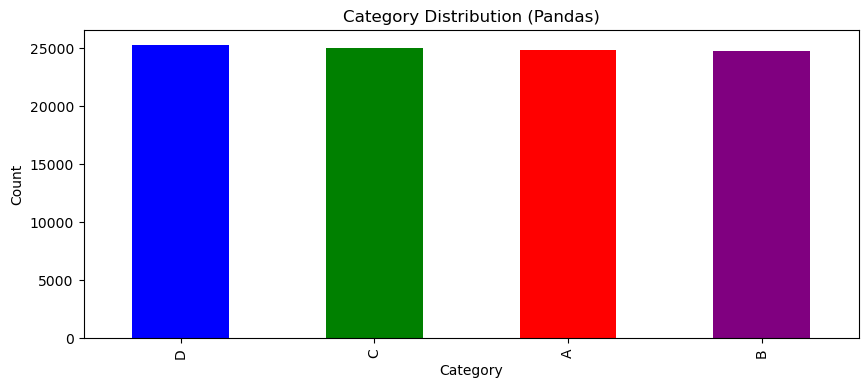

In [9]:
# Plot Category Distribution
plt.figure(figsize=(10, 4))
pandas_category_count.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title("Category Distribution (Pandas)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


In [12]:
insights = {
    "Basic Stats - Pandas": pandas_stats.to_dict(),
    "Basic Stats - Dask": dask_stats.to_dict(),
    "Category Count - Pandas": pandas_category_count.to_dict(),
    "Category Count - Dask": dask_category_count.to_dict(),
    "Mean Value by Hour - Pandas": pandas_time_series.to_dict(),
    "Mean Value by Hour - Dask": dask_time_series.to_dict(),
    "Execution Time (Pandas Stats)": pandas_stats_time,
    "Execution Time (Dask Stats)": dask_stats_time,
    "Execution Time (Pandas Category Count)": pandas_category_time,
    "Execution Time (Dask Category Count)": dask_category_time,
    "Execution Time (Pandas Time-Series)": pandas_time_series_time,
    "Execution Time (Dask Time-Series)": dask_time_series_time
}

#Print insights
print("\nInsights from Analysis:")
for key, value in insights.items():
    print(f"{key}: {value}")


Insights from Analysis:
Basic Stats - Pandas: {'count': 100000.0, 'mean': 500.78797, 'std': 288.3819415544616, 'min': 1.0, '25%': 250.0, '50%': 500.0, '75%': 751.0, 'max': 999.0}
Basic Stats - Dask: {'count': 100000.0, 'mean': 500.78797, 'std': 288.3819415544622, 'min': 1.0, '25%': 250.0, '50%': 500.0, '75%': 751.0, 'max': 999.0}
Category Count - Pandas: {'D': 25328, 'C': 25046, 'A': 24848, 'B': 24778}
Category Count - Dask: {'A': 24848, 'B': 24778, 'C': 25046, 'D': 25328}
Mean Value by Hour - Pandas: {0: 495.71238095238095, 1: 501.3261904761905, 2: 501.88142857142856, 3: 495.58809523809526, 4: 504.31166666666667, 5: 498.3066666666667, 6: 505.085, 7: 511.30857142857144, 8: 503.5645238095238, 9: 491.68904761904764, 10: 505.3430622009569, 11: 500.0727053140097, 12: 499.98140096618357, 13: 495.34613526570047, 14: 502.27463768115945, 15: 504.76473429951693, 16: 499.8512077294686, 17: 506.0157004830918, 18: 500.42487922705317, 19: 494.6321256038647, 20: 497.27294685990336, 21: 501.91884057